<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Deep-Learning-in-Python" data-toc-modified-id="Deep-Learning-in-Python-1">Deep Learning in Python</a></span>
            <ul class="toc-item"><li><span><a href="#CNN-Cancer-Detection-Mini-Project" data-toc-modified-id="#CNN-Cancer-Detection-Mini-Project-1.1">CNN Cancer Detection Mini Project</a></span>
                <ul class="toc-item"><li><span><a href="#Kothandaraman-Sikamani
" data-toc-modified-id="Kothandaraman-Sikamani-1.1.1"><a href="http://www.ipowersoft.com" rel="nofollow" target="_blank">Kothandaraman Sikamani</a></a></span>
                    </li></ul>
                </li>
            </ul>
        </li>
        <li><span><a href="#We'll-cover-below-aspects-during-this-analysis:" data-toc-modified-id="We'll-cover-below-aspects-during-this-analysis:-2">We'll cover below aspects during this analysis:</a></span></li>
        <li><span><a href="#1.-Import-Libraries" data-toc-modified-id="1.-Import-Libraries-3">1. Import Libraries</a></span></li>
        <li><span><a href="#2.-Loading-data" data-toc-modified-id="2.-Loading-data-4">2. Loading data</a></span>
            <ul class="toc-item">
                <li><span><a href="#Function:-pandas.read_csv()" data-toc-modified-id="Function:-pandas.read_csv()-4.0.1">Function: pandas.read_csv()</a></span></li>
                <li><span><a href="#Function:-DataFrame.shape()" data-toc-modified-id="Function:-DataFrame.shape()-4.0.2">Function: DataFrame.shape()</a></span></li>
            </ul>
        </li>
        <li><span><a href="#3.-EDA(Exploratory-Data-Analysis)" data-toc-modified-id="3.-EDA-5">3. EDA</a></span></li>
        <li><span><a href="#4.-Describe-Model-Architecture" data-toc-modified-id="4.-Describe-Model-Architecture-6">4. Describe Model Architecture</a></span></li>
        <li><span><a href="#5.-Let's-do-some-Visualization" data-toc-modified-id="5.-Let's-do-some-Visualization-7">5. Let's do some Visualization</a></span></li>
        <li><span><a href="#6.-Data-Processing" data-toc-modified-id="6.-Data-Processing-8">6. Data Processing</a></span>
        <li><span><a href="#7.-Results-and-Analysis" data-toc-modified-id="7.-Results-and-Analysis-9">7. Results and Analysis</a></span>
        <li><span><a href="#Conclusion/Summary" data-toc-modified-id="Conclusion/Summary-10">Conclusion/Summary</a></span></li>
    </ul>
</div>

<div class="alert alert-block alert-success">
    <h1 align="center">Deep Learning in Python</h1>
    <h2 align="center">CNN Cancer Detection Mini Project</h3>
    <h3 align="center"><a href="http://www.ipowersoft.com">Kothandaraman Sikamani</a></h5>
</div>

# Introduction

This notebook is for predicting cancer detection from digital pathology images by using computer vision machine learning technqiues.
The data can be obtained from the competition website at https://www.kaggle.com/competitions/histopathologic-cancer-detection/data.  

Here is the GitHub repo URL for the project work https://github.com/ipowersoft/dl-cancer-detection-using-cnn  

This study aims to improve cancer detection in lymph nodes by using computer vision machine learning technqiues. This notebook covers the thought process as to how to create simple CNN models.

# We'll cover below aspects during this analysis:

- Import Library
- Load Data
- EDA(Exploratory Data Analysis)
- Visualization
- Data Processing
- Conclusion/Summary

# 1. Import Libraries

- NumPy (import numpy as np): NumPy is a library for working with arrays and matrices in Python. It provides various mathematical functions and operations that make it easier to work with numerical data. In this code, NumPy is being imported with the alias np, which makes it easier to refer to the library throughout the code.  


- Pandas (import pandas as pd): Pandas is a library for working with tabular data in Python. It provides a variety of tools for data manipulation, analysis, and visualization. In this code, Pandas is being imported with the alias pd, which makes it easier to refer to the library throughout the code.  


- Matplotlib (import matplotlib.pyplot as plt): Matplotlib is a library for creating data visualizations in Python. It provides various functions and tools for creating plots, charts, and graphs. In this code, the pyplot submodule of Matplotlib is being imported with the alias plt, which makes it easier to refer to the library throughout the code.  

And other list of libraries are,  
- warnings  
- string  
- os  
- random  
- shuffle  
- shutil  
- matplotlib.pyplot  
- matplotlib.patches  
- seaborn  
- tensorflow  
- ImageDataGenerator  
- RandomFlip, RandomZoom, RandomRotation  
- Conv2D, MaxPooling2D, AveragePooling2D  
- Dense, Flatten, Dropout  
- Sequential  
- BatchNormalization  

In [1]:
!pip install --upgrade pip
!pip install seaborn
!pip install plotly
!pip install scikit-image
#!pip install pandas-profiling



In [2]:

import warnings
import string
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.patches as patches
from skimage.transform import rotate
from skimage import io
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas_profiling as pp
from tifffile import imread
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout


# 2. Loading Data

### Function: pandas.read_csv()

- pd.read_csv('sample_submission.csv'): This line reads in a CSV file called "sample_submission.csv" and creates a Pandas DataFrame from it. The pd alias refers to the pandas library that was imported earlier.  

- pd.read_csv('train_labels.csv'): This line reads in a CSV file called "train_labels.csv" and creates a Pandas DataFrame from it. The pd alias refers to the pandas library that was imported earlier.

### Function: DataFrame.shape()

- sample_submission.shape: This line prints the shape attribute of the sample_submission DataFrame, which returns a tuple containing the number of rows and columns in the DataFrame. The shape attribute is a built-in Pandas attribute that can be used to get the shape of a DataFrame.  

- train_data.shape: This line prints the shape attribute of the train_data DataFrame, which returns a tuple containing the number of rows and columns in the DataFrame. The shape attribute is a built-in Pandas attribute that can be used to get the shape of a DataFrame.

In [3]:
test_path = '../input/histopathologic-cancer-detection/test/'
train_path = '../input/histopathologic-cancer-detection/train/'
sample_submission = pd.read_csv('../input/histopathologic-cancer-detection/sample_submission.csv')
train_data = pd.read_csv('../input/histopathologic-cancer-detection/train_labels.csv')


In [4]:
sample_submission.shape
train_data.shape

(220025, 2)

In [5]:
# find total training images and testing images
train_images = glob(train_path+'*.tif')
test_images = glob(test_path+'*.tif')

print(f'Total Training Images: {len(train_images)}')
print(f'Total Testing Images: {len(test_images)}')

Total Training Images: 220025
Total Testing Images: 57458


In [6]:
display(train_data)

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
...,...,...
220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
220021,d4b854fe38b07fe2831ad73892b3cec877689576,1
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0


# 3. EDA (Exploratory Data Analysis)

Here are some of the helper functions

In [7]:
%%time
import skimage.io as io
# load images from train images and corresponding into arrays x and y
label_dictionary = {img_path:label for img_path, label in
                    zip(train_data['id'].values,
                        train_data['label'].values)
                   }
X = np.array([io.imread(img_path) for img_path in train_images[:25000]])
y = np.array([label_dictionary[img_path.split('/')[-1][:-4]] for img_path in train_images[:25000]])

CPU times: user 16 s, sys: 3.69 s, total: 19.7 s
Wall time: 3min 31s


In [8]:
def basic_task(train,set_first):
    if set_first == '1':
        print("The number of Null Values in our dataset")
        if train.isnull().values.sum() > 1:
            train.dropna(inplace=True)
        print("This is how our data looks like")

        train.describe()
        print("Number of articles that are unique")

        profiler(train)
        train.info()

def profiler(train):
    profile = pp.ProfileReport(train, title = "Profiling Report", explorative = True)
    profile.to_notebook_iframe()
    profile.to_file("profile.html")



    print("Generating Data Frame Profile")


In [9]:
basic_task(train_data,set_first = '1')



The number of Null Values in our dataset
This is how our data looks like
Number of articles that are unique


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Generating Data Frame Profile
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


# 4. Describe Model Architecture

Normalize images pre-training (image/255)  
Optimization (Adam with learning rate 0.0001)  
Dropout (0.3)  
Output layer activation (sigmoid)

# 5. Let's do some Visualization

According to images, there are lots of pink colored photo in cancer group, this color bias can be information for prediction.

<Axes: ylabel='count'>

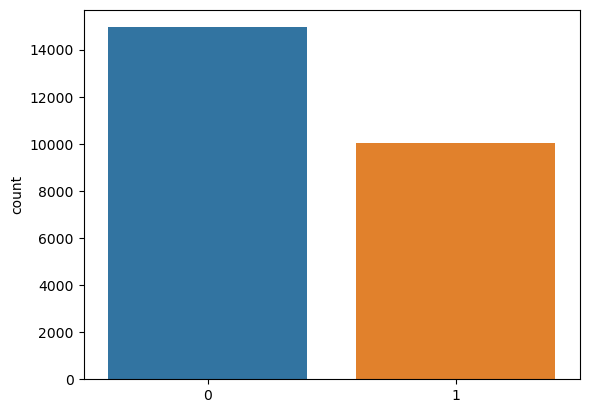

In [10]:
sns.countplot(x = y)

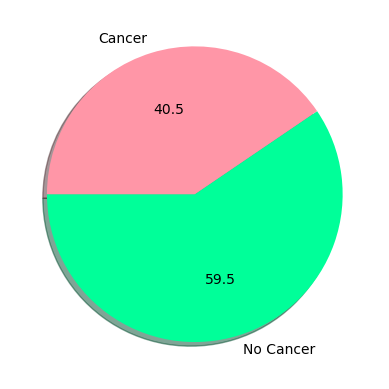

<Figure size 1600x1600 with 0 Axes>

In [11]:
# generates a pie chart to visualize the distribution of cancer and non-cancer labels in the train_data dataset
labels_count = train_data['label'].value_counts()

%matplotlib inline
plt.pie(labels_count, labels = ['No Cancer', 'Cancer'], startangle = 180,
        autopct = '%1.1f', colors = ['#00ff99','#FF96A7'], shadow = True)
plt.figure(figsize = (16,16))
plt.show()

## Plot of photo

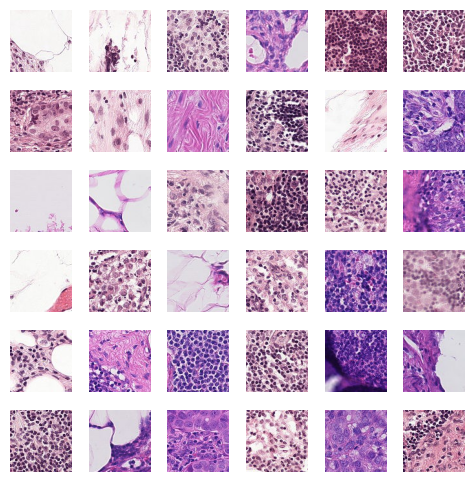

In [12]:
# creates a 6x6 grid of subplots and shows 36 images from the images_train dataset in the grid
# The images are read from the file paths specified by the 'id' column and are displayed using imshow from matplotlib.
# The subplots_adjust function is used to adjust the spacing between the subplots, and plt.show() is called to display the grid of images.
images_train = train_data
images_train['label'] = images_train['label'].astype(str)
images_train['id'] = train_data['id'] + '.tif'
rows, cols = 6, 6

fig, axes = plt.subplots(rows, cols, figsize = (6, 6))

for i in range(6 * 6):
    image = imread(train_path + images_train['id'][i])

    row, col = i // cols, i % cols

    axes[row, col].imshow(image)
    axes[row, col].axis('off')

plt.subplots_adjust(wspace = 0.1, hspace = 0.3)

plt.show()

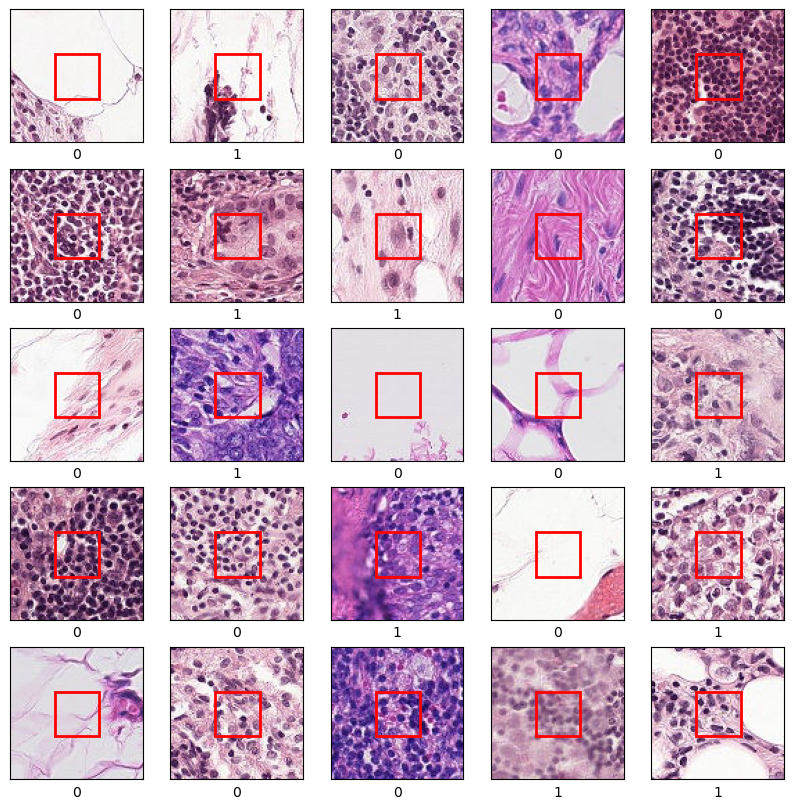

In [13]:
# code creates a 5x5 grid of subplots and displays 25 images from the images_train dataset.
#It reads each image, displays it on a subplot, adds a red rectangle to each image using patches.Rectangle
fig, ax = plt.subplots(5, 5, figsize = (10, 10))
for i, axis in enumerate(ax.flat):
    file = str(train_path + images_train.id[i] )
    image = io.imread(file)
    axis.imshow(image)
    box = patches.Rectangle((32,32),32,32, linewidth = 2, edgecolor = 'r',facecolor = 'none', linestyle = '-')
    axis.add_patch(box)
    axis.set(xticks = [], yticks = [], xlabel = images_train.label[i]);

# 6. Data Processing

In [14]:
#set up the appropriate distribution strategy based on the availability of TPUs.
#If TPUs are available, it sets up the TPUStrategy for distributed training on TPUs.
tpu = None
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy()


In [15]:
#  code sets up the data generators for training and validation data, prepares them for image preprocessing, and configures them to work with GPUs if available.
# These generators will be used for model training and evaluation.
RANDOM_STATE = 49
BATCH_SIZE = 256
# Set up GPU configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is set up successfully.")
    except RuntimeError as e:
        print(e)

# Define the train and validation data split
train, valid = train_test_split(train_data, test_size=0.2)

# Define the data generators
train_datagen =  ImageDataGenerator(rescale = 1./255.,
                            validation_split = 0.15)

test_datagen =  ImageDataGenerator(rescale = 1./255.,
                            validation_split = 0.15)

# Set up the data generators with GPU support
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_data,
    directory = train_path,
    x_col = "id",
    y_col = "label",
    subset = "training",
    batch_size = BATCH_SIZE,
    seed = RANDOM_STATE,
    class_mode = "binary",
    target_size = (64,64))

valid_generator = test_datagen.flow_from_dataframe(
    dataframe = train_data,
    directory = train_path,
    x_col = "id",
    y_col = "label",
    subset = "validation",
    batch_size = BATCH_SIZE,
    seed = RANDOM_STATE,
    class_mode = "binary",
    target_size = (64,64))

# Additional print statement to check GPU setup
print("GPU is available:", tf.test.is_gpu_available())

GPU is set up successfully.
Found 187022 validated image filenames belonging to 2 classes.
Found 33003 validated image filenames belonging to 2 classes.
GPU is available: True


## Different Models

In [16]:
ROC_model2 = tf.keras.metrics.AUC()

with strategy.scope():
    model_two = Sequential()

    model_two.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', ))
    model_two.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'))
    model_two.add(MaxPooling2D(pool_size = (2,2)))
    model_two.add(Dropout(0.1))

    model_two.add(BatchNormalization())
    model_two.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
    model_two.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
    model_two.add(AveragePooling2D(pool_size = (2,2)))
    model_two.add(Dropout(0.1))

    model_two.add(BatchNormalization())
    model_two.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
    model_two.add(Flatten())
    model_two.add(Dense(1, activation = 'sigmoid'))

    #build model by input size
    model_two.build(input_shape = (256, 64, 64, 3))       # original image = (96, 96, 3)

    #compile
    adam_optimizer = Adam(learning_rate = 0.0001)
    model_two.compile(loss = 'binary_crossentropy', metrics = ['accuracy', ROC_model2], optimizer = adam_optimizer)

In [17]:
hist_model2 = model_two.fit(train_generator, validation_data=valid_generator, epochs=3)

Epoch 1/3


2023-07-07 16:52:32.076012: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


731/731 [==============================] - 1332s 2s/step - loss: 0.4762 - accuracy: 0.7783 - auc: 0.8470 - val_loss: 0.5230 - val_accuracy: 0.7703 - val_auc: 0.8220
Epoch 2/3
731/731 [==============================] - 304s 415ms/step - loss: 0.3997 - accuracy: 0.8249 - auc: 0.8940 - val_loss: 0.5379 - val_accuracy: 0.7841 - val_auc: 0.8880
Epoch 3/3
731/731 [==============================] - 292s 399ms/step - loss: 0.3783 - accuracy: 0.8366 - auc: 0.9064 - val_loss: 0.5139 - val_accuracy: 0.8002 - val_auc: 0.8997


In [18]:
#plot the training and validation accuracy as well as the training and validation loss over the epochs
def plot_scores(history):

    fig, ax = plt.subplots(1,2, figsize = (12, 5))
    ax[0].plot(history.history["accuracy"], label = "train")
    ax[0].plot(history.history["val_accuracy"], label = "val")
    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("accuracy")
    ax[0].set_ylim([0.7,1])
    ax[0].set_title("Accuracy")
    ax[0].legend()

    ax[1].plot(history.history["loss"], label = "train")
    ax[1].plot(history.history["val_loss"], label = "val")
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("loss")
    ax[1].set_ylim([0,1])
    ax[1].set_title("Loss")
    ax[1].legend()

    plt.show()

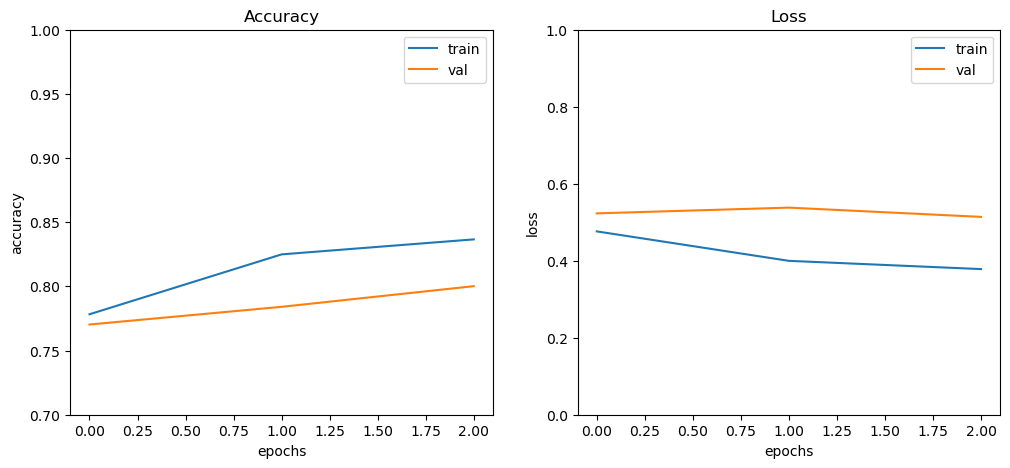

In [19]:
plot_scores(hist_model2)

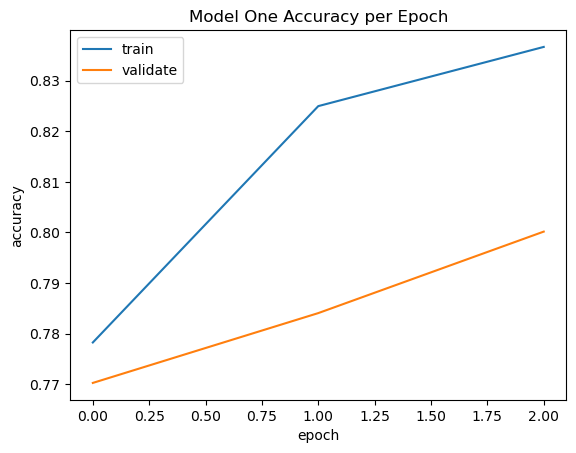

In [20]:
plt.plot(hist_model2.history['accuracy'])
plt.plot(hist_model2.history['val_accuracy'])
plt.title('Model One Accuracy per Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc = 'upper left')
plt.show();


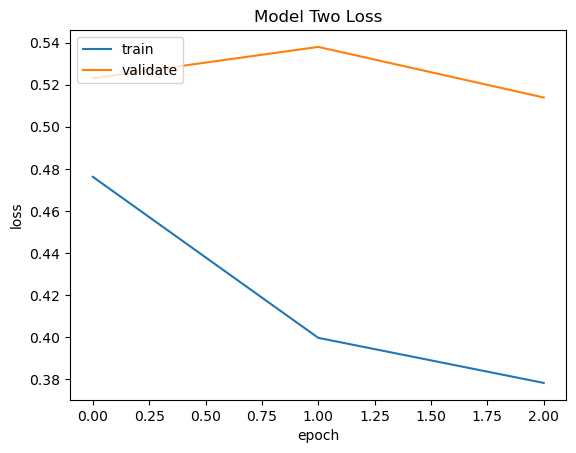

In [21]:
plt.plot(hist_model2.history['loss'])
plt.plot(hist_model2.history['val_loss'])
plt.title('Model Two Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

# plot model ROC per epoch



In [22]:
sample_submission.head()



,id,label
0,0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5,0
1,95596b92e5066c5c52466c90b69ff089b39f2737,0
2,248e6738860e2ebcf6258cdc1f32f299e0c76914,0
3,2c35657e312966e9294eac6841726ff3a748febf,0
4,145782eb7caa1c516acbe2eda34d9a3f31c41fd6,0


In [23]:
submission_df = pd.DataFrame({'id':os.listdir(test_path)})
submission_df.head()

,id
0,a7ea26360815d8492433b14cd8318607bcf99d9e.tif
1,59d21133c845dff1ebc7a0c7cf40c145ea9e9664.tif
2,5fde41ce8c6048a5c2f38eca12d6528fa312cdbb.tif
3,bd953a3b1db1f7041ee95ff482594c4f46c73ed0.tif
4,523fc2efd7aba53e597ab0f69cc2cbded7a6ce62.tif


In [24]:
test_df = pd.DataFrame({'id':os.listdir(test_path)})
test_df.head()

,id
0,a7ea26360815d8492433b14cd8318607bcf99d9e.tif
1,59d21133c845dff1ebc7a0c7cf40c145ea9e9664.tif
2,5fde41ce8c6048a5c2f38eca12d6528fa312cdbb.tif
3,bd953a3b1db1f7041ee95ff482594c4f46c73ed0.tif
4,523fc2efd7aba53e597ab0f69cc2cbded7a6ce62.tif


In [25]:
datagen_test = ImageDataGenerator(rescale=1./255.)

test_generator = datagen_test.flow_from_dataframe(
    dataframe = test_df,
    directory = test_path,
    x_col = 'id',
    y_col = None,
    target_size = (64,64),         # original image = (96, 96)
    batch_size = 1,
    shuffle = False,
    class_mode = None)

Found 57458 validated image filenames.


In [26]:
predictions = model_two.predict(test_generator, verbose = 1)

57458/57458 [==============================] - 404s 7ms/step


In [27]:
predictions = np.transpose(predictions)[0]
copy_df = pd.DataFrame()
copy_df['id'] = submission_df['id'].apply(lambda x: x.split('.')[0])
copy_df['label'] = list(map(lambda x: 0 if x < 0.5 else 1, predictions))
copy_df.head()

,id,label
0,a7ea26360815d8492433b14cd8318607bcf99d9e,1
1,59d21133c845dff1ebc7a0c7cf40c145ea9e9664,0
2,5fde41ce8c6048a5c2f38eca12d6528fa312cdbb,0
3,bd953a3b1db1f7041ee95ff482594c4f46c73ed0,1
4,523fc2efd7aba53e597ab0f69cc2cbded7a6ce62,0


In [28]:
copy_df['label'].value_counts()

0    28797
1    28661
Name: label, dtype: int64

In [29]:
copy_df.to_csv('submission.csv', index = False)

# 7. Results and Analysis
Above plots and diagrams for model shows the performance with the training (and validation) sets. We can see accuracy and loss are not steady in the model. Its trained with very few epochs(3) and a CNN model with more pictures need more time to train to converge.

# Conclusion/Summary

We performed well with the training sets from the above plots and visualizations for each model. By cropping a part of image, and check probability of cancer by CNN, we can guess what are cancer cells look like.  
The total number of training images used is 220025 and total number of test images used is 57458.  

Here is the GitHub repo URL for the project work https://github.com/ipowersoft/dl-cancer-detection-using-cnn